C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

Random Forest Performance Metrics:
Fluoride - RMSE: 43.1067064883642, MAE: 4.1862511968085085
Arsenic - RMSE: 0.0036888924758168677, MAE: 0.0012507313829787238
Nitrate - RMSE: 11.039065311860478, MAE: 2.4754079787234042

Gradient Boosting Performance Metrics:
Fluoride - RMSE: 44.065303005891735, MAE: 4.481549473866229
Arsenic - RMSE: 0.0037298201711790245, MAE: 0.001459164474994861
Nitrate - RMSE: 11.067633874300547, MAE: 2.5232988190120107


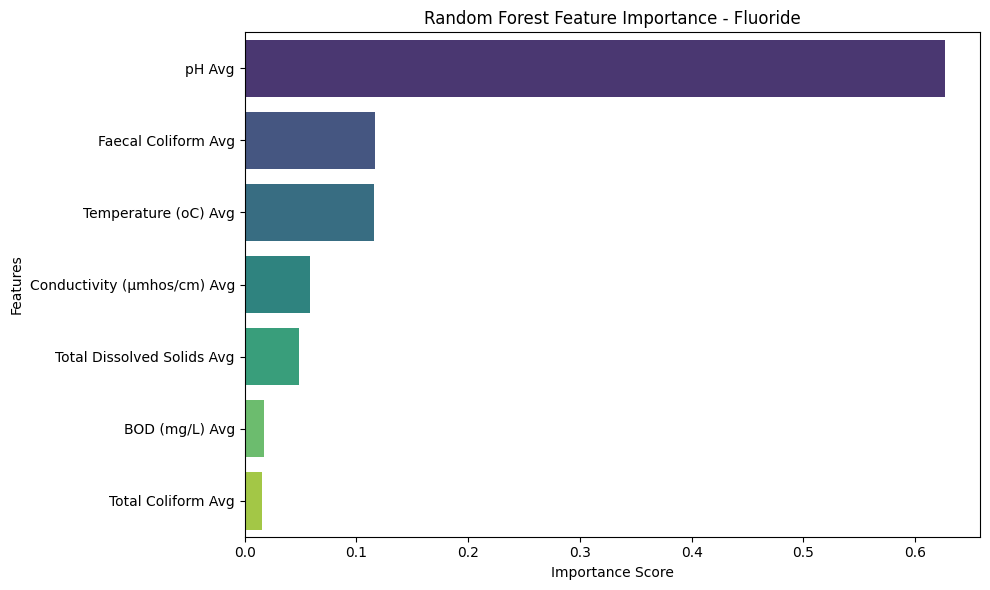

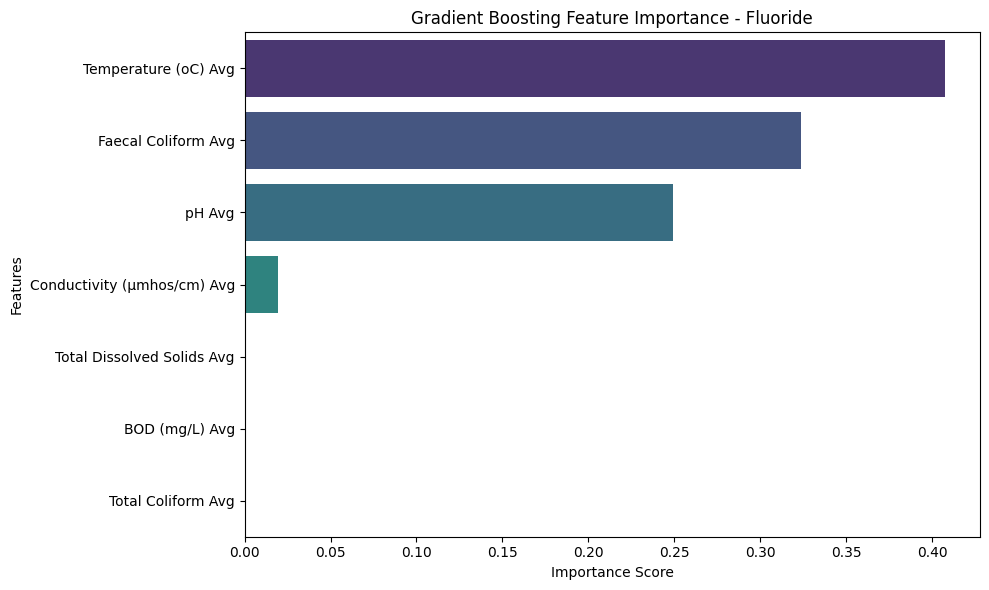

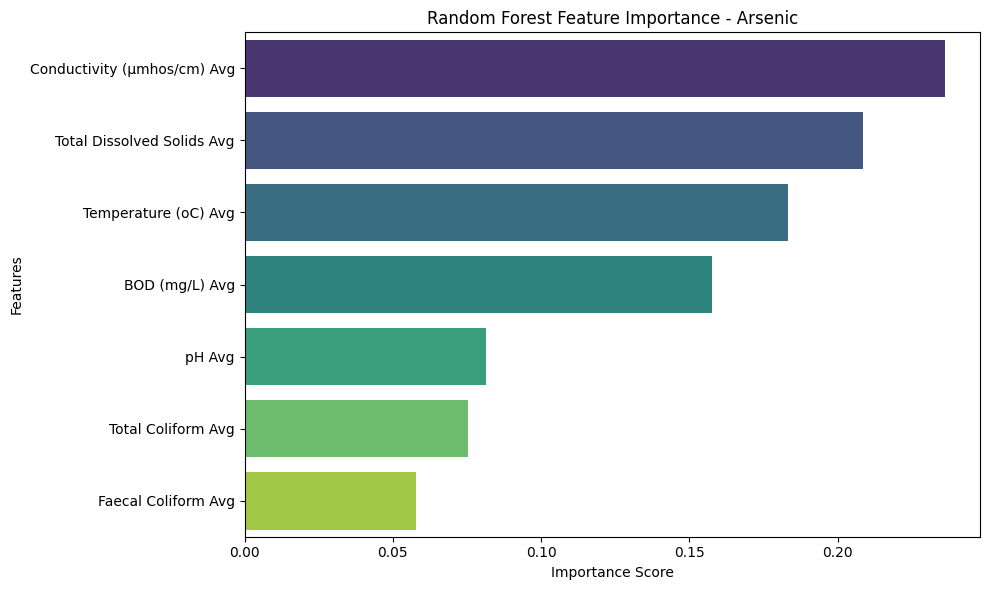

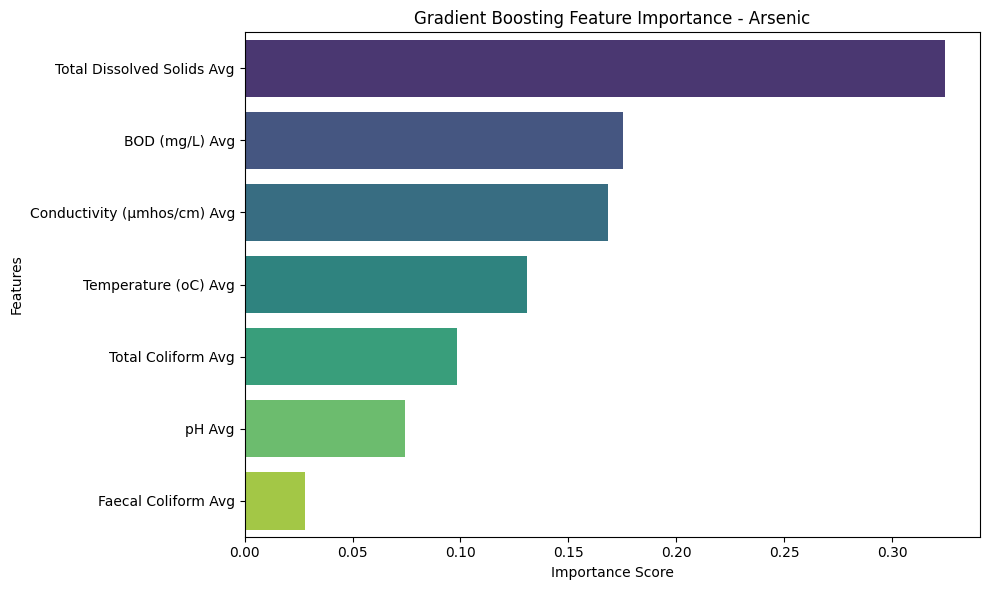

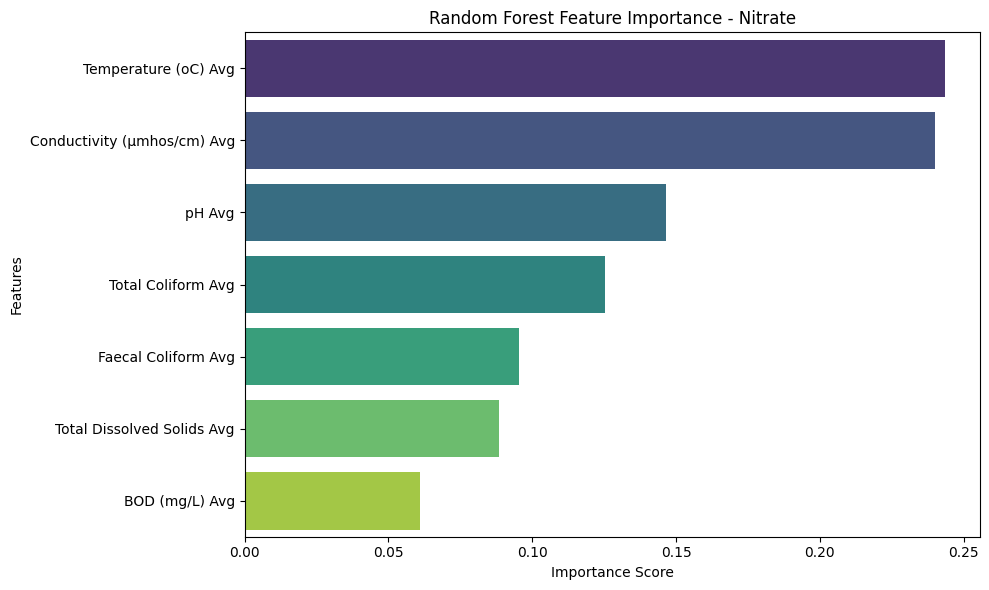

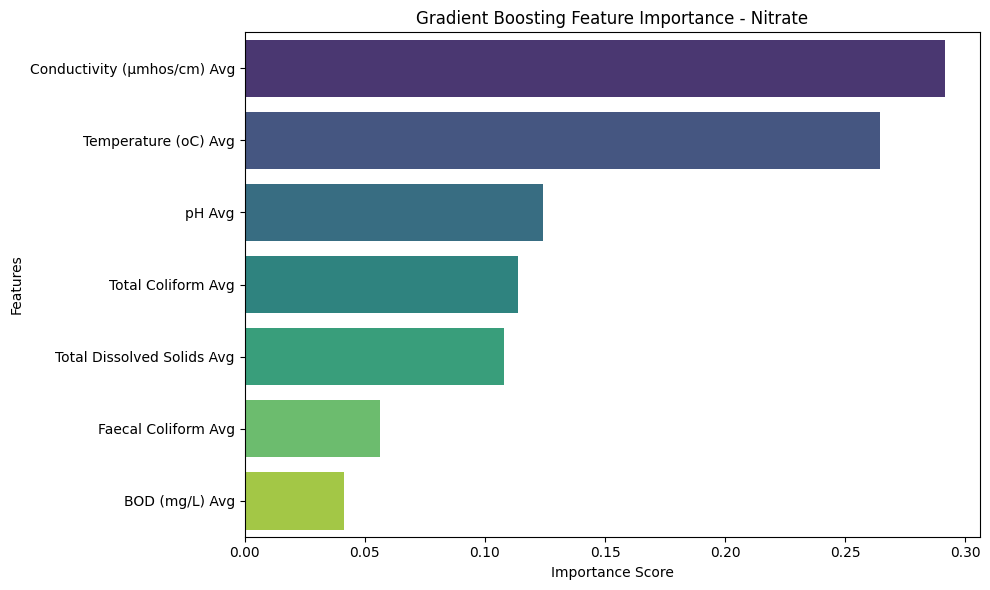

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
file_path = 'C:/Users/aksha/Desktop/Water quality data/Updated_NWMP_DATA_2022.xlsx'
data = pd.read_excel(file_path)

# Compute averages for min and max columns
data['Temperature (oC) Avg'] = data[['Temperature (oC) Min', 'Temperature (oC) Max']].mean(axis=1)
data['pH Avg'] = data[['pH Min', 'pH Max']].mean(axis=1)
data['Conductivity (µmhos/cm) Avg'] = data[['Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']].mean(axis=1)
data['BOD (mg/L) Avg'] = data[['BOD (mg/L) Min', 'BOD (mg/L) Max']].mean(axis=1)
data['Nitrate Avg'] = data[['Nitrate-N + Nitrite-N  (mg/L) Min', 'Nitrate-N + Nitrite-N  (mg/L) Max']].mean(axis=1)
data['Arsenic Avg'] = data[['Arsenic (mg/L) Min', 'Arsenic (mg/L) Max']].mean(axis=1)
data['Fluoride Avg'] = data[['Fluoride (mg/L) Min', 'Fluoride (mg/L) Max']].mean(axis=1)
data['Faecal Coliform Avg'] = data[['Fecal Coliform (MPN/100ml) Min', 'Fecal Coliform (MPN/100ml) Max']].mean(axis=1)
data['Total Coliform Avg'] = data[['Total Coliform (MPN/100ml) Min', 'Total Coliform (MPN/100ml) Max']].mean(axis=1)
data['Total Dissolved Solids Avg'] = data[['Total Dissolved Solids (mg/L) Min', 'Total Dissolved Solids (mg/L) Max']].mean(axis=1)

# Define the standard limits for each parameter as provided in the report
standards = {
    'BOD (mg/L) Avg': 1.5,
    'pH Avg': 8,
    'Conductivity (µmhos/cm) Avg': 950,
    'Nitrate Avg': 10,
    'Faecal Coliform Avg': 50,
    'Total Coliform Avg': 50,
    'Total Dissolved Solids Avg': 75,
    'Fluoride Avg': 4,
    'Arsenic Avg': 0.01
}

# Ideal values for parameters (assumed to be 0 for all except pH which is 7)
ideal_values = {
    'BOD (mg/L) Avg': 0,
    'pH Avg': 7,
    'Conductivity (µmhos/cm) Avg': 0,
    'Nitrate Avg': 0,
    'Faecal Coliform Avg': 0,
    'Total Coliform Avg': 0,
    'Total Dissolved Solids Avg': 0,
    'Fluoride Avg': 0,
    'Arsenic Avg': 0
}

# Calculate the unit weight (Wn) for each parameter
k = 1 / sum([1/standards[param] for param in standards])
weights = {param: k/standards[param] for param in standards}

# Function to calculate the quality rating (Qn) for each parameter
def calculate_qn(value, param):
    Vn = value
    Videal = ideal_values[param]
    Sn = standards[param]
    Qn = ((Vn - Videal) / (Sn - Videal)) * 100
    return Qn

# Function to calculate the Water Quality Index (WQI) for a row of data
def calculate_wqi(row):
    Qn_values = {param: calculate_qn(row[param], param) for param in standards}
    WQI = sum(Qn_values[param] * weights[param] for param in standards) / sum(weights.values())
    return WQI

# Calculate WQI for each row in the dataset
data['WQI'] = data.apply(calculate_wqi, axis=1)

# Define Quality Status based on WQI ranges
def quality_status(wqi):
    if wqi <= 25:
        return "Excellent"
    elif wqi <= 50:
        return "Good"
    elif wqi <= 75:
        return "Poor"
    elif wqi <= 100:
        return "Very Poor"
    else:
        return "Unfit for Consumption"

# Add a new column for Quality Status
data['Quality Status'] = data['WQI'].apply(quality_status)

# Select features excluding Fluoride Avg, Nitrate Avg, and Arsenic Avg
X = data[['Temperature (oC) Avg', 'pH Avg', 'Conductivity (µmhos/cm) Avg', 'BOD (mg/L) Avg', 
          'Faecal Coliform Avg', 'Total Coliform Avg', 'Total Dissolved Solids Avg']]

# Targets for Fluoride, Arsenic, and Nitrate
y_fluoride = data['Fluoride Avg']
y_arsenic = data['Arsenic Avg']
y_nitrate = data['Nitrate Avg']

# Split the data into training and testing sets
X_train, X_test, y_train_fluoride, y_test_fluoride = train_test_split(X, y_fluoride, test_size=0.33, random_state=42)
_, _, y_train_arsenic, y_test_arsenic = train_test_split(X, y_arsenic, test_size=0.33, random_state=42)
_, _, y_train_nitrate, y_test_nitrate = train_test_split(X, y_nitrate, test_size=0.33, random_state=42)

# Initialize and train Random Forest models for each target
rf_model_fluoride = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_fluoride.fit(X_train, y_train_fluoride)

rf_model_arsenic = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_arsenic.fit(X_train, y_train_arsenic)

rf_model_nitrate = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_nitrate.fit(X_train, y_train_nitrate)

# Initialize and train Gradient Boosting models for each target
gb_model_fluoride = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_fluoride.fit(X_train, y_train_fluoride)

gb_model_arsenic = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_arsenic.fit(X_train, y_train_arsenic)

gb_model_nitrate = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_nitrate.fit(X_train, y_train_nitrate)

# Evaluate models for Fluoride
rf_rmse_fluoride = mean_squared_error(y_test_fluoride, rf_model_fluoride.predict(X_test), squared=False)
rf_mae_fluoride = mean_absolute_error(y_test_fluoride, rf_model_fluoride.predict(X_test))

gb_rmse_fluoride = mean_squared_error(y_test_fluoride, gb_model_fluoride.predict(X_test), squared=False)
gb_mae_fluoride = mean_absolute_error(y_test_fluoride, gb_model_fluoride.predict(X_test))

# Evaluate models for Arsenic
rf_rmse_arsenic = mean_squared_error(y_test_arsenic, rf_model_arsenic.predict(X_test), squared=False)
rf_mae_arsenic = mean_absolute_error(y_test_arsenic, rf_model_arsenic.predict(X_test))

gb_rmse_arsenic = mean_squared_error(y_test_arsenic, gb_model_arsenic.predict(X_test), squared=False)
gb_mae_arsenic = mean_absolute_error(y_test_arsenic, gb_model_arsenic.predict(X_test))

# Evaluate models for Nitrate
rf_rmse_nitrate = mean_squared_error(y_test_nitrate, rf_model_nitrate.predict(X_test), squared=False)
rf_mae_nitrate = mean_absolute_error(y_test_nitrate, rf_model_nitrate.predict(X_test))

gb_rmse_nitrate = mean_squared_error(y_test_nitrate, gb_model_nitrate.predict(X_test), squared=False)
gb_mae_nitrate = mean_absolute_error(y_test_nitrate, gb_model_nitrate.predict(X_test))

# Print model performance metrics
print("Random Forest Performance Metrics:")
print(f"Fluoride - RMSE: {rf_rmse_fluoride}, MAE: {rf_mae_fluoride}")
print(f"Arsenic - RMSE: {rf_rmse_arsenic}, MAE: {rf_mae_arsenic}")
print(f"Nitrate - RMSE: {rf_rmse_nitrate}, MAE: {rf_mae_nitrate}")

print("\nGradient Boosting Performance Metrics:")
print(f"Fluoride - RMSE: {gb_rmse_fluoride}, MAE: {gb_mae_fluoride}")
print(f"Arsenic - RMSE: {gb_rmse_arsenic}, MAE: {gb_mae_arsenic}")
print(f"Nitrate - RMSE: {gb_rmse_nitrate}, MAE: {gb_mae_nitrate}")

# Feature importance from Random Forest and Gradient Boosting for Fluoride
importance_rf_fluoride = rf_model_fluoride.feature_importances_
importance_gb_fluoride = gb_model_fluoride.feature_importances_

# Feature importance from Random Forest and Gradient Boosting for Arsenic
importance_rf_arsenic = rf_model_arsenic.feature_importances_
importance_gb_arsenic = gb_model_arsenic.feature_importances_

# Feature importance from Random Forest and Gradient Boosting for Nitrate
importance_rf_nitrate = rf_model_nitrate.feature_importances_
importance_gb_nitrate = gb_model_nitrate.feature_importances_

# Plotting feature importance for Fluoride - Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=np.sort(importance_rf_fluoride)[::-1], y=X.columns[np.argsort(importance_rf_fluoride)[::-1]], palette='viridis')
plt.title("Random Forest Feature Importance - Fluoride")
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('rf_fluoride_importance.png', bbox_inches='tight')  # Save the plot with adjusted layout
plt.show()

# Plotting feature importance for Fluoride - Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=np.sort(importance_gb_fluoride)[::-1], y=X.columns[np.argsort(importance_gb_fluoride)[::-1]], palette='viridis')
plt.title("Gradient Boosting Feature Importance - Fluoride")
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('gb_fluoride_importance.png', bbox_inches='tight')  # Save the plot with adjusted layout
plt.show()

# Plotting feature importance for Arsenic - Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=np.sort(importance_rf_arsenic)[::-1], y=X.columns[np.argsort(importance_rf_arsenic)[::-1]], palette='viridis')
plt.title("Random Forest Feature Importance - Arsenic")
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('rf_arsenic_importance.png', bbox_inches='tight')  # Save the plot with adjusted layout
plt.show()

# Plotting feature importance for Arsenic - Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=np.sort(importance_gb_arsenic)[::-1], y=X.columns[np.argsort(importance_gb_arsenic)[::-1]], palette='viridis')
plt.title("Gradient Boosting Feature Importance - Arsenic")
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('gb_arsenic_importance.png', bbox_inches='tight')  # Save the plot with adjusted layout
plt.show()

# Plotting feature importance for Nitrate - Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=np.sort(importance_rf_nitrate)[::-1], y=X.columns[np.argsort(importance_rf_nitrate)[::-1]], palette='viridis')
plt.title("Random Forest Feature Importance - Nitrate")
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('rf_nitrate_importance.png', bbox_inches='tight')  # Save the plot with adjusted layout
plt.show()

# Plotting feature importance for Nitrate - Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=np.sort(importance_gb_nitrate)[::-1], y=X.columns[np.argsort(importance_gb_nitrate)[::-1]], palette='viridis')
plt.title("Gradient Boosting Feature Importance - Nitrate")
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('gb_nitrate_importance.png', bbox_inches='tight')  # Save the plot with adjusted layout
plt.show()


# # Save the updated dataset to a new Excel file with WQI and Quality Status
# output_file_path = 'C:/Users/aksha/Desktop/Water quality data/Updated_NWMP_DATA_2022_with_WQI.xlsx'
# data.to_excel(output_file_path, index=False)

# print(f"Updated dataset saved to {output_file_path}")
